## Data Exploration

In this notebook, I will be following the below link and attempting to implement some exploratory data analysis

In [39]:
import torch
from torchvision import datasets, transforms

import tensorflow as tf
from tensorflow.keras import layers, models

import sklearn
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

In [63]:
# Load dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform= transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform= transforms.ToTensor())

print("Training size: ", len(mnist_train))
print("Testing size: ", len(mnist_test))

Training size:  60000
Testing size:  10000


In [65]:
# Split data into train, validate and test
# X = np.asarray([dataset[i][0] for i in range(len(dataset))]).astype('float32')
# y = np.asarray([dataset[i][1] for i in range(len(dataset))]).astype('float32')

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(0.3))
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((1/3)))

X_train = tf.cast(mnist_train.data, dtype = tf.float32)
X_test = tf.cast(mnist_test.data, dtype = tf.float32)
y_train = tf.cast(mnist_train.targets, dtype = tf.float32)
y_test = tf.cast(mnist_test.targets, dtype = tf.float32)

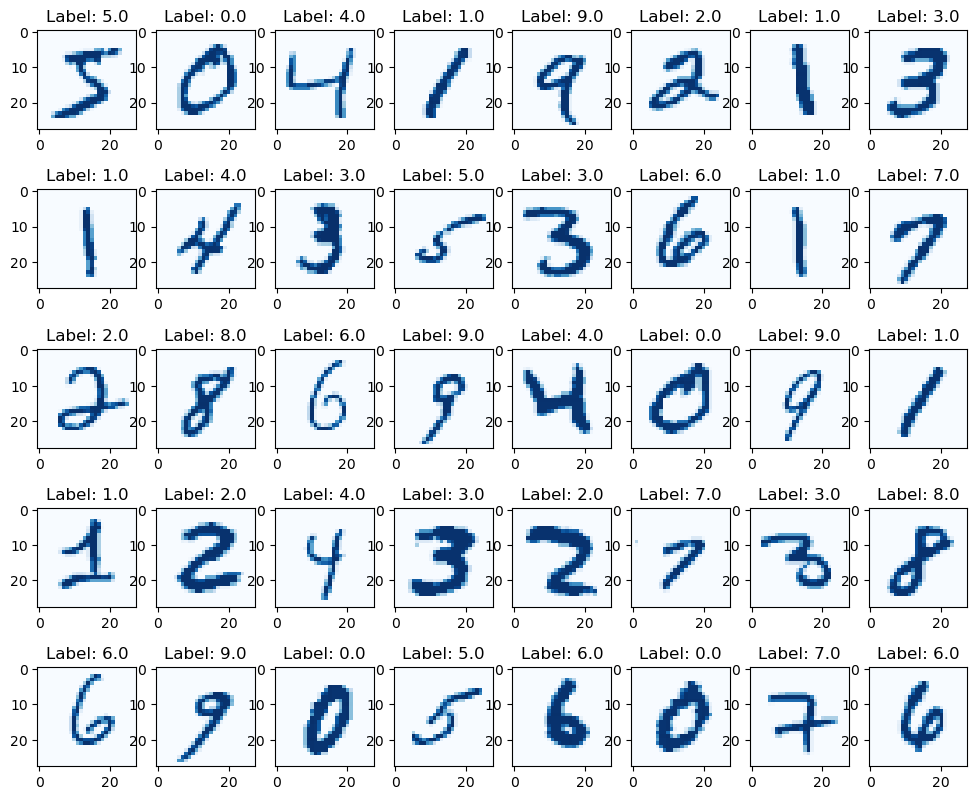

In [67]:
fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(1.5*8, 2*5))
for i, ax in enumerate(axes.flatten()):
    image = X_train[i]
    label = y_train[i]
    ax.set_title(f"Label: {label}")
    ax.imshow(image, cmap='Blues')
plt.show()

## Convolution Neural Network

In [68]:
X_train[0].shape

TensorShape([28, 28])

##### CNN Model 0 (Convolution, Max Pooling, Flatten, Fully Connected, Fully Connected)

In [34]:
model0 = models.Sequential()

model0.add(layers.Conv2D(filters = 32, kernel_size = (4, 4), strides = (2, 2), activation='relu', input_shape=(28, 28, 1)))
model0.add(layers.MaxPooling2D(pool_size = (2,2)))
model0.add(layers.Flatten())
model0.add(layers.Dense(units = 100, activation='relu'))
model0.add(layers.Dense(units = 10))

model0.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model0.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 13, 13, 32)        544       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               115300    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 116,854
Trainable params: 116,854
Non-trainable params: 0
_______________________________________________

In [70]:
run0 = model0.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9928
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0271 - accuracy: 0.9929
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9930
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - accuracy: 0.9938
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0238 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021